In [41]:
import cv2
import numpy as np

In [66]:
image_file = '/Users/annaleontjeva/Dropbox/Screenshots/Screenshot 2017-08-13 19.02.26.png'

In [67]:
image = cv2.imread(image_file)

In [68]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [69]:
lower, upper = ([0, 146, 190], [62, 212, 255])

lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

In [70]:
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(image, lower, upper)

# Bitwise-AND mask and original image
#output = cv2.bitwise_and(image, image, mask= mask)

In [71]:
mask.shape

(1542, 870)

In [72]:
mask.sum()

3109215

In [18]:
output.shape

(1542, 870, 3)

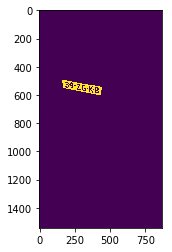

In [73]:
imgplot = plt.imshow(mask)
plt.show()

In [74]:
x = np.nonzero(mask)[1]
y = np.nonzero(mask)[0]

In [96]:
np.argmax(x)

5953

In [97]:
x[5953]

442

In [98]:
y[5953]

546

In [100]:
x[x==max(x)], y[x==max(x)]

(array([442, 442, 442, 442, 442, 442, 442, 442, 442, 442, 442, 442, 442,
        442, 442, 442, 442, 442, 442, 442, 442, 442, 442]),
 array([546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558,
        559, 560, 561, 562, 563, 564, 565, 566, 567, 568]))

In [84]:
margin = 100

In [76]:
image.shape

(1542, 870, 3)

In [ ]:
np.min(y[x==max(x)])

In [163]:
piece_of_img = image[min(y): max(y) , min(x) : max(x), :]

In [93]:
piece_of_img = image[(min(y) - margin):(max(y) + margin), (min(x) - margin) : (max(x) + margin), :]

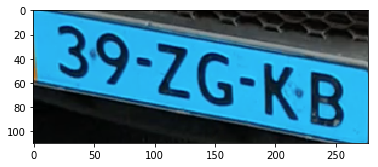

In [164]:
imgplot = plt.imshow(piece_of_img)
plt.show()

In [89]:
rows,cols,ch = piece_of_img.shape

In [145]:
top_left = [min(x), min(y[x==min(x)])]
top_right = [max(x), min(y[x==max(x)])]
bottom_left = [min(x), max(y[x==min(x)])+50]
bottom_right = [max(x), max(y[x==max(x)])+30]

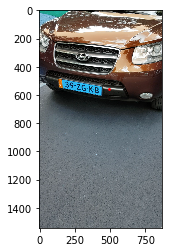

In [152]:
imgplot = plt.imshow(image)

plt.scatter(top_left[1],bottom_left[1] , c='red', s=3)
plt.show()


In [153]:
top_left, top_right, bottom_left, bottom_right

([165, 495], [442, 546], [165, 554], [442, 598])

In [160]:
rows,cols,ch = image.shape
height = bottom_left[1] - top_left[1]  
width = top_right[0] - top_left[0]

pts1 = np.float32([top_left, top_right, bottom_left, bottom_right])
pts2 = np.float32([[0,0],[width, 0],[0, height],[width,height]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(image,M,(width,height))


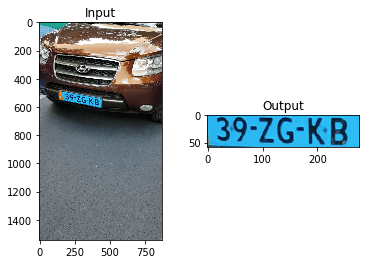

In [161]:
plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [165]:
import re

In [174]:
wanted = 'GPS Coordinates                 : 50 deg 49\' 1.92" N, 5 deg 48\' 10.08" E\\n'

In [212]:
m = re.match(r'GPS Coordinates[^\d]*(\d{1,3})[^\d]*(\d\d)[^\d]*(\d.\d\d)[^\d]*(\d)[^\d]*(\d\d)[^\d]*(\d\d.\d\d)[^\d]*\\n', str(wanted))

In [213]:
m.groups()

('50', '49', '1.92', '5', '48', '10.08')

In [ ]:
\s*:\s*([\w\'" ,\\.\\]*)\\n'